In [1]:
dataset = read.csv('Data.csv')
dataset = dataset[2:3]

In [2]:
install.packages('randomForest')   
install.packages('ggplot2')
library(randomForest)
library(ggplot2)
install.packages("rpart")
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("rpart"):
“installation of package ‘rpart’ had non-zero exit status”


In [3]:
regressor <-rpart(formula = Salary ~., data = dataset, control = rpart.control(minsplit = 1))
summary(regressor)

Call:
rpart(formula = Salary ~ ., data = dataset, control = rpart.control(minsplit = 1))
  n= 10 

          CP nsplit  rel error   xerror      xstd
1 0.77638626      0 1.00000000 1.234568 0.7835133
2 0.15496716      1 0.22361374 1.220478 0.7855722
3 0.05217357      2 0.06864658 1.220478 0.7855722
4 0.01000000      3 0.01647301 1.220478 0.7855722

Variable importance
Level 
  100 

Node number 1: 10 observations,    complexity param=0.7763863
  mean=249500, MSE=8.066225e+10 
  left son=2 (8 obs) right son=3 (2 obs)
  Primary splits:
      Level < 8.5 to the left,  improve=0.7763863, (0 missing)

Node number 2: 8 observations,    complexity param=0.05217357
  mean=124375, MSE=6.921484e+09 
  left son=4 (6 obs) right son=5 (2 obs)
  Primary splits:
      Level < 6.5 to the left,  improve=0.7600316, (0 missing)

Node number 3: 2 observations,    complexity param=0.1549672
  mean=750000, MSE=6.25e+10 
  left son=6 (1 obs) right son=7 (1 obs)
  Primary splits:
      Level < 9.5 to the left,

In [4]:
y_pred <-  predict(regressor, data.frame(Level = 6.5))
y_pred

1 
250000

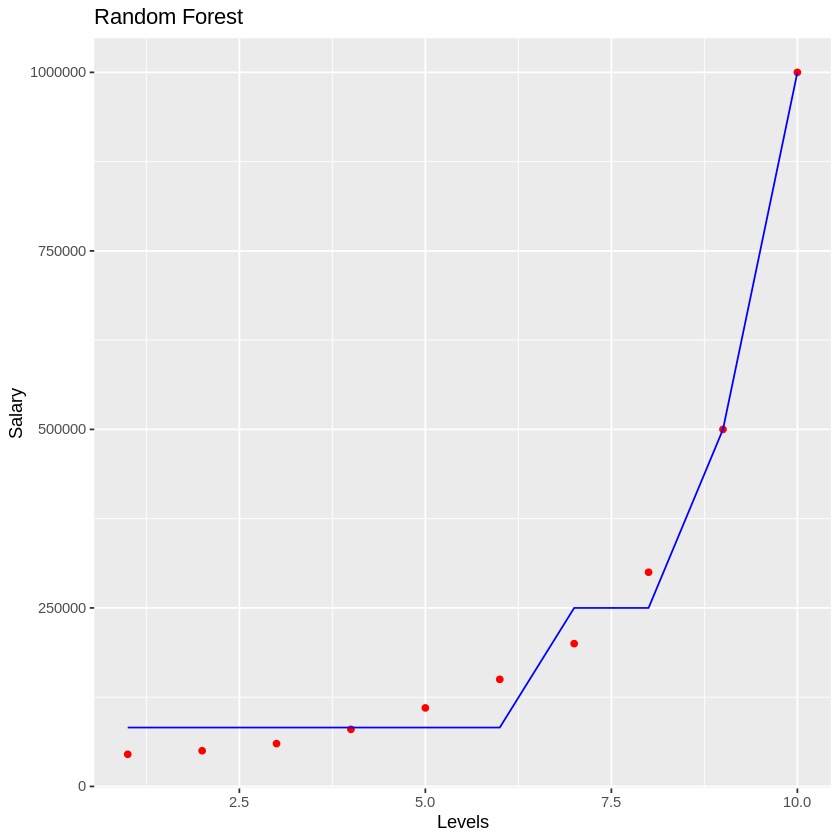

In [5]:
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary), colour = "red") +
  geom_line(aes(x = dataset$Level, y = predict(regressor, newdata = dataset)), colour = "blue")+
  ggtitle("Random Forest") +
  xlab("Levels") +
  ylab("Salary")